In [0]:
import os
import sys

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn.preprocessing as skpp
import scipy.sparse.linalg as ll
import matplotlib.image as mpimg
import skimage

test_image = ["subject01-test.gif", "subject14-test.gif"]
X1 = []
X14 = []
img_test = []
path = '/content/drive/My Drive/yalefaces'
i = 0
j = 0

In [0]:
for filename in os.listdir(path):
    if not filename in test_image:
        if i <=9:
            i+=1
           
            img = mpimg.imread(os.path.join(path, filename))
            img_flat = img.flatten()
            X1.append(img_flat)
        else:
            
            img = mpimg.imread(os.path.join(path, filename))
            img_flat = img.flatten()
            X14.append(img_flat)            
    else:
        img = mpimg.imread(os.path.join(path, filename))
        img_flat = img.flatten()
        img_test.append(img_flat)

X1 = np.array(X1).T
X14 = np.array(X14).T
img_test = np.array(img_test).T
m, n = X1.shape


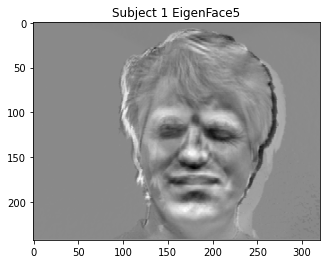

In [4]:
def norm_array(X):
    X_stdA = np.std(X,axis = 0)
    X_stdA = skpp.normalize(X_stdA.reshape(1,-1)) 
    X = X@np.diag(np.ones(X_stdA.shape[1])/X_stdA[0])
    X = X.T
    return X

def center_array(X):
    X_mu = np.mean(X, axis = 1)
    X_c = X - X_mu[:,None]
    return X_c

def eigndecompo (X_xc, K=6, m=m):
    C = np.matmul(X_xc,X_xc.T)/m
    S,W = ll.eigs(C,k = K)
    return S, W

def get_eigenFaces(W, X_xc, S):
    Eigenface_array = np.dot(W.T, X_xc)/np.sqrt(S[:,None])
    return np.real(Eigenface_array)

X1 = norm_array(X1)
X1_xc = center_array(X1)
X1_S, X1_W = eigndecompo(X1_xc, K=6, m=m)
X1_EGFaces = get_eigenFaces(X1_W, X1_xc, X1_S)
for i in range((X1_EGFaces.shape)[0]):
    plt.imshow(X1_EGFaces[i].reshape(243, 320), cmap=plt.get_cmap('gray'))
    plt.title("Subject 1 EigenFace"+str(i))
    plt.savefig("Subject 1_EigenFace"+str(i)+".png")

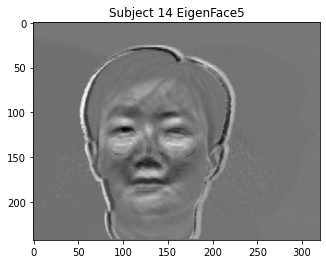

In [5]:
X14 = norm_array(X14)
X14_xc = center_array(X14)
X14_S, X14_W = eigndecompo (X14_xc, K=6, m=m)
X14_EGFaces = get_eigenFaces(X14_W, X14_xc, X14_S)
for i in range((X14_EGFaces.shape)[0]):
    plt.imshow(X14_EGFaces[i].reshape(243, 320), cmap=plt.get_cmap('gray'))
    plt.title("Subject 14 EigenFace"+str(i))
    plt.savefig("Subject 14_EigenFace"+str(i)+".png")

img_test = norm_array(img_test)
img_test_xc = center_array(img_test)
test1 = img_test_xc[0,:]
test14 = img_test_xc[1,:]

In [0]:
def test_image_project(eigenfaces_array, test_image, num_Eigenfaces):
    projection_score = []
    for i in range(num_Eigenfaces):
        temp_res = np.dot(eigenfaces_array[i].T, test_image[:, None]) / (np.linalg.norm(eigenfaces_array[i], ord = 2)*np.linalg.norm(test_image[:, None], ord = 2))
        projection_score.append(temp_res[0])
    return projection_score

In [7]:
#score for test subject1 for eigenface 1
t1_EG1 = test_image_project(X1_EGFaces, test1, 6)

#score for test subject1 for eigenface 14
t1_EG14 = test_image_project(X14_EGFaces, test1, 6)

#score for test subject14 for eigenface 1
t14_EG1 = test_image_project(X1_EGFaces, test14, 6)

#score for test subject14 for eigenface 14
t14_EG14 = test_image_project(X14_EGFaces, test14, 6)
print("Subject 1 test image projected to top Eigenfaces of 1 ", [round(j,2) for j in t1_EG1],"\nhighest score =" ,round(max(t1_EG1),2))
print("Subject 1 test image projected to top Eigenfaces of 14 ", [round(j,2) for j in t1_EG14],"\nhighest score =" ,round(max(t1_EG14),2))
print("Subject 14 test image projected to top Eigenfaces of 1 ", [round(j,2) for j in t14_EG1],"\nhighest score =" ,round(min(t14_EG1),2))
print("Subject 14 test image projected to top Eigenfaces of 14 ", [round(j,2) for j in t14_EG14],"\nhighest score =" ,round(min(t14_EG14),2))

Subject 1 test image projected to top Eigenfaces of 1  [0.89, 0.14, -0.16, -0.06, -0.12, 0.0] 
highest score = 0.89
Subject 1 test image projected to top Eigenfaces of 14  [-0.29, 0.59, 0.09, 0.14, -0.04, -0.03] 
highest score = 0.59
Subject 14 test image projected to top Eigenfaces of 1  [0.24, -0.42, -0.01, -0.15, -0.06, 0.02] 
highest score = -0.42
Subject 14 test image projected to top Eigenfaces of 14  [-0.94, -0.12, 0.16, -0.05, 0.09, -0.05] 
highest score = -0.94
